## 3. 검색 알고리즘(배열 검색) (07.04)

- 검색 알고리즘의 종류 : 배열 검색, 연결 리스트 검색, 이진 검색 트리 검색
- 배열 검색
    - 선형 검색 : 무작위의 데이터 집합에서 검색을 수행
    - 이진 검색 : 일정한 규칙으로 늘어놓은 데이터 집합에서 빠르게 검색을 수행
    - 해시법 : 추가, 삭제가 자주 일어나는 데이터 집합에서 빠르게 검색을 수행

### 1. 선형 검색(Sequential Search)
- 종료 조건 : 검색할 값을 찾지 못하고 배열의 끝을 지나가거나 검색할 원소를 찾는 경우

In [5]:
from typing import Any, Sequence

# 선형 검색 함수
def seq_search(a : Sequence, key: any) -> int:
    for i in range(len(a)):
        if a[i] == key:
            return i # 검색 성공(인덱스를 반환)
    return -1 # 검색 실패(-1을 반환


# Main 실행
num = int(input('원소 수를 입력하세요.:')) # num 값 입력
x = [None] * num # 원소 수가 num인 배열을 생성

for i in range(num):
    x[i] = int(input(f'x[{i}]: '))
    
ky = int(input('검색할 값을 입력하세요.: ')) # 검색할 키 ky를 입력받음

idx = seq_search(x, ky)

if idx == -1:
    print('검색값을 갖는 원소가 존재하지 않습니다.')
else :
    print(f'검색값은 x[{idx}]에 있습니다.')

원소 수를 입력하세요.: 3
x[0]:  12
x[1]:  44
x[2]:  54
검색할 값을 입력하세요.:  54


검색값은 x[2]에 있습니다.


#### ※ 보초법(sentinel method) : 종료 조건을 검색할 원소를 찾는 경우로 최소화

In [2]:
from typing import Any, Sequence
import copy

# 선형 검색 함수(보초법)
def sentinel_search(seq : Sequence, key: any) -> int:
    a = copy.deepcopy(seq) # seq를 복사
    a.append(key) # 보초 key를 추가
    
    i = 0
    while True:
        if a[i] == key:
            break # 검색에 성공하면 while문을 종료
        i += 1
    return -1 if i == len(seq) else i # 검색에 실패했을 경우 -1을 반환


# Main 실행
num = int(input('원소 수를 입력하세요.:')) # num 값 입력
x = [None] * num # 원소 수가 num인 배열을 생성

for i in range(num):
    x[i] = int(input(f'x[{i}]: '))
    
ky = int(input('검색할 값을 입력하세요.: ')) # 검색할 키 ky를 입력받음

idx = sentinel_search(x, ky)

if idx == -1:
    print('검색값을 갖는 원소가 존재하지 않습니다.')
else :
    print(f'검색값은 x[{idx}]에 있습니다.')

원소 수를 입력하세요.: 5
x[0]:  12
x[1]:  4
x[2]:  3
x[3]:  3
x[4]:  2
검색할 값을 입력하세요.:  7


검색값을 갖는 원소가 존재하지 않습니다.


### 2. 이진 검색(Binary Search)
- 오름차순이나 내림차순으로 정렬된 배열에서 좀 더 효율적인 검색 가능
- 종료 조건
    - a의 중앙 원소 값이 key와 일치하는 경우
    - 검색 범위가 더 이상 없는 경우
- 시간복잡도 : 반복마다 검색 범위가 대략 절반이 줄어드므로 필요 비교 횟수는 평균 log(n)

In [6]:
from typing import Any, Sequence

# 이진 검색 함수
def bin_search(a : Sequence, key: any) -> int:
    pl = 0 # 검색 범위 맨 앞 원소의 인덱스
    pr = len(a) - 1 # 검색 범위 맨 끝 원소의 인덱스

    while True:
        pc = (pl + pr) // 2 # 중앙 원소의 인덱스
        # Case 1: 검색 성공
        if a[pc] == key:
            return pc
        # Case 2: 검색 범위를 뒤쪽 절반으로 좁힘
        elif a[pc] < key:
            pl = pc + 1
        # Case 3: 검색 범위를 앞쪽 절반으로 좁힘
        else:
            pr = pc - 1
            
        if pl > pr:
            break
    return - 1
    

# Main 실행
num = int(input('원소 수를 입력하세요.:')) # num 값 입력
x = [None] * num # 원소 수가 num인 배열을 생성

print('배열 데이터를 오름차순으로 입력하세요.')

for i in range(num):
    x[i] = int(input(f'x[{i}]: '))
    
ky = int(input('검색할 값을 입력하세요.: ')) # 검색할 키 ky를 입력받음

idx = bin_search(x, ky)

if idx == -1:
    print('검색값을 갖는 원소가 존재하지 않습니다.')
else :
    print(f'검색값은 x[{idx}]에 있습니다.')

원소 수를 입력하세요.: 5


배열 데이터를 오름차순으로 입력하세요.


x[0]:  1
x[1]:  2
x[2]:  3
x[3]:  4
x[4]:  5
검색할 값을 입력하세요.:  7


검색값을 갖는 원소가 존재하지 않습니다.


#### ※ 복잡도(complexity) : 알고리즘의 성능을 객관적으로 평가하는 기준
- 시간 복잡도(time complexity) : 실행하는 데 필요한 시간을 평가, Big O로 표현
- 공간 복잡도(space complexity) : 메모리(기억 공간)와 파일 공간이 얼마나 필요한지를 평가  

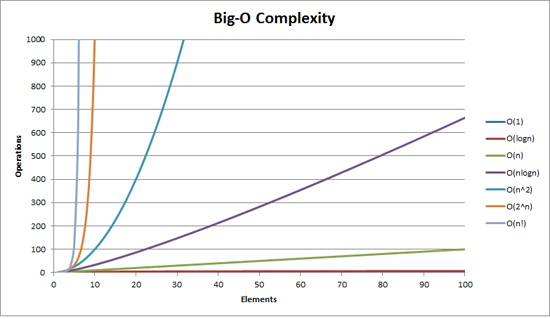

### 3. 해시법(Hashing)
- 검색, 데이터의 추가, 삭제까지 효율적으로 수행할 수 있는 검색 알고리즘
- 해시 함수(Hash Function) : 키를 해시값으로 저장하는 과정
- 버킷(Bucket) : 해시 테이블에서 만들어지는 원소
- 충돌(Collision) : 저장할 버킷이 중복되는 현상

#### ※ 해시법에서 충돌이 발생하는 경우
-  체인법(Chaining) or 오픈 해시법(Open Hashing) : 해시값이 같은 원소를 연결 리스트로 관리
- 오픈 주소법 : 빈 버킷을 찾을 때까지 해시를 반복